# Modification Study

## 0. Setup

In [1]:
import os, sys
from tqdm.notebook import tqdm
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append("..")

In [2]:
DIR_PATH = 'F:/20210730_samples'
SAVE_PATH = os.path.join(DIR_PATH, 'numpy')
CT_PATH = os.path.join(SAVE_PATH, 'CT_target')
PT_PATH = os.path.join(SAVE_PATH, 'PT_resize')

## 1. Voxel Analysis

In [3]:
# Voxel Loading...

CT_list = os.listdir(CT_PATH)
PT_list = os.listdir(PT_PATH)

sample_num = len(os.listdir(CT_PATH)) # extract sample #
vol_shape = np.load(os.path.join(CT_PATH, CT_list[0])).shape # extract data shape
CT_voxel = np.zeros([sample_num, *vol_shape])
PT_voxel = np.zeros([sample_num, *vol_shape])

for i in range(sample_num):
    CT_voxel[i] = np.load(os.path.join(CT_PATH, CT_list[i]))
    PT_voxel[i] = np.load(os.path.join(PT_PATH, PT_list[i]))

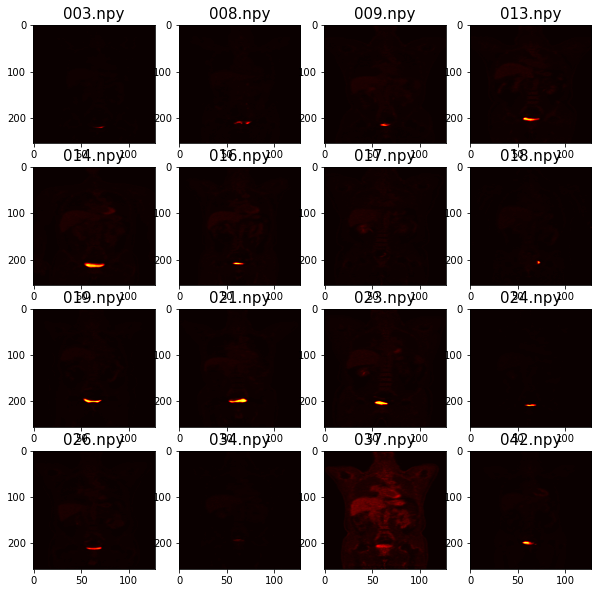

In [28]:
# Check PET images
from common.plot import mid_plot
fig = plt.figure(figsize=(10,10))
mid_plot(PATH=PT_PATH, fig=fig, grid=(4,4), vmax=1, cmap=plt.cm.hot)

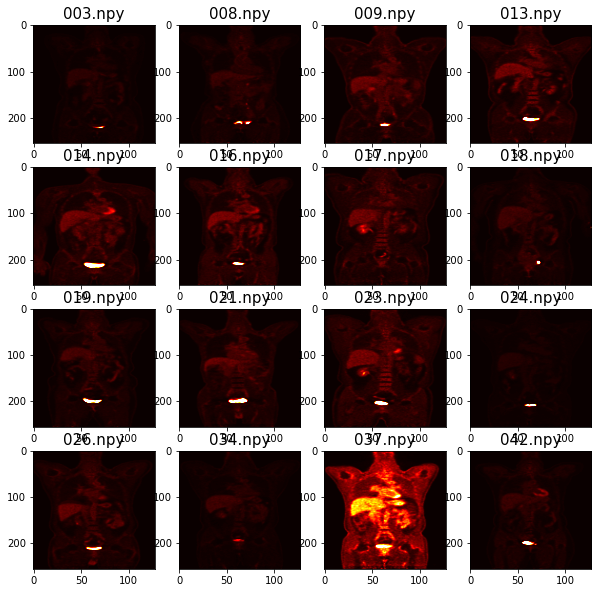

In [14]:
# With Max Limit
fig = plt.figure(figsize=(10,10))
mid_plot(PATH=PT_PATH, fig=fig, grid=(4,4), vmax=0.2, cmap=plt.cm.hot)

In [30]:
# Range Check

for i in range(16):
    print ('CT: [{:.1f}, {:.1f}], PT: [{:.1f}, {:.1f}]'.format(np.min(4095*CT_voxel[i]), np.max(4095*CT_voxel[i]), np.min(32767*PT_voxel[i]), np.max(32767*PT_voxel[i])))

CT: [-67.1, 4274.4], PT: [-47.6, 33224.3]
CT: [-133.5, 4518.8], PT: [-938.5, 37186.9]
CT: [-78.7, 4675.5], PT: [-88.7, 30182.2]
CT: [-212.5, 4836.9], PT: [-781.6, 33138.6]
CT: [-98.7, 4393.9], PT: [-430.1, 31704.8]
CT: [-185.1, 4097.6], PT: [-801.9, 32093.9]
CT: [-410.4, 4237.8], PT: [-300.8, 31119.8]
CT: [-70.0, 4153.8], PT: [-1228.1, 27181.4]
CT: [-421.1, 4512.1], PT: [-965.0, 31356.8]
CT: [-240.9, 4440.8], PT: [-1576.8, 34363.9]
CT: [-75.2, 4394.3], PT: [-930.9, 33814.7]
CT: [-314.0, 4359.2], PT: [-484.2, 32275.0]
CT: [-246.4, 4492.8], PT: [-1228.2, 35239.0]
CT: [-152.8, 4375.3], PT: [-278.5, 33685.5]
CT: [-224.6, 4611.7], PT: [-361.3, 32207.9]
CT: [-314.6, 4529.3], PT: [-188.1, 32742.3]


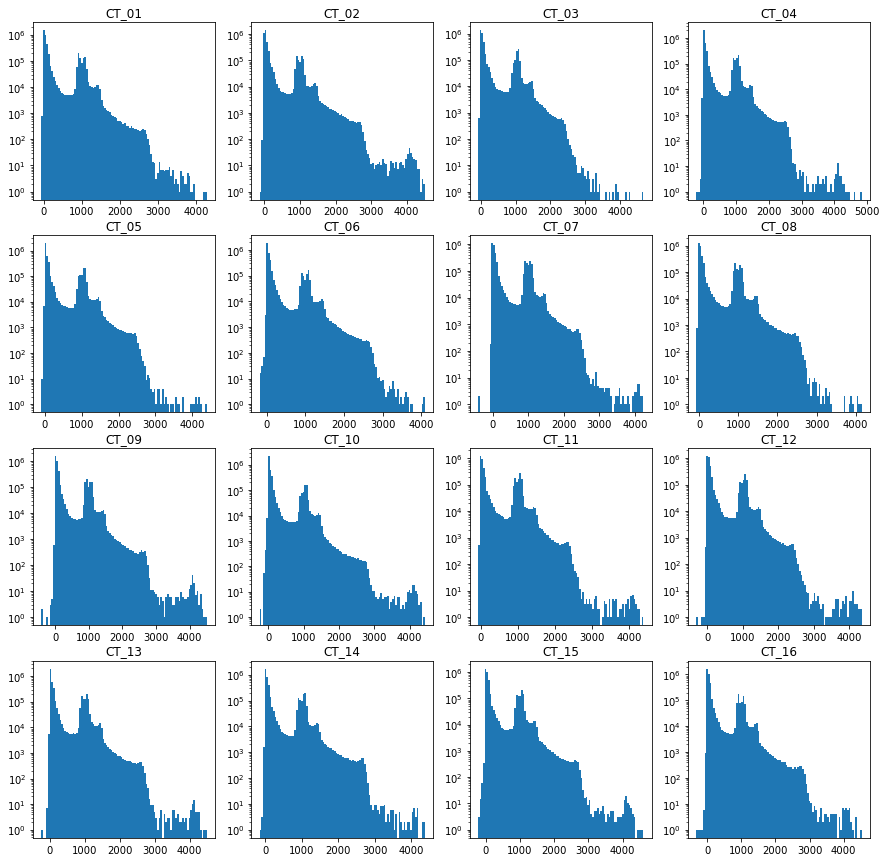

In [13]:
# CT Voxel Distribution

fig = plt.figure(figsize=(15,15))
axes = []

for i in range(16):
    axes.append(fig.add_subplot(4,4,i+1))
    axes[-1].set_title('CT_{:02d}'.format(i+1))
    axes[-1].hist((4095*CT_voxel[i]).reshape(-1), bins=100, log=True)

plt.show()

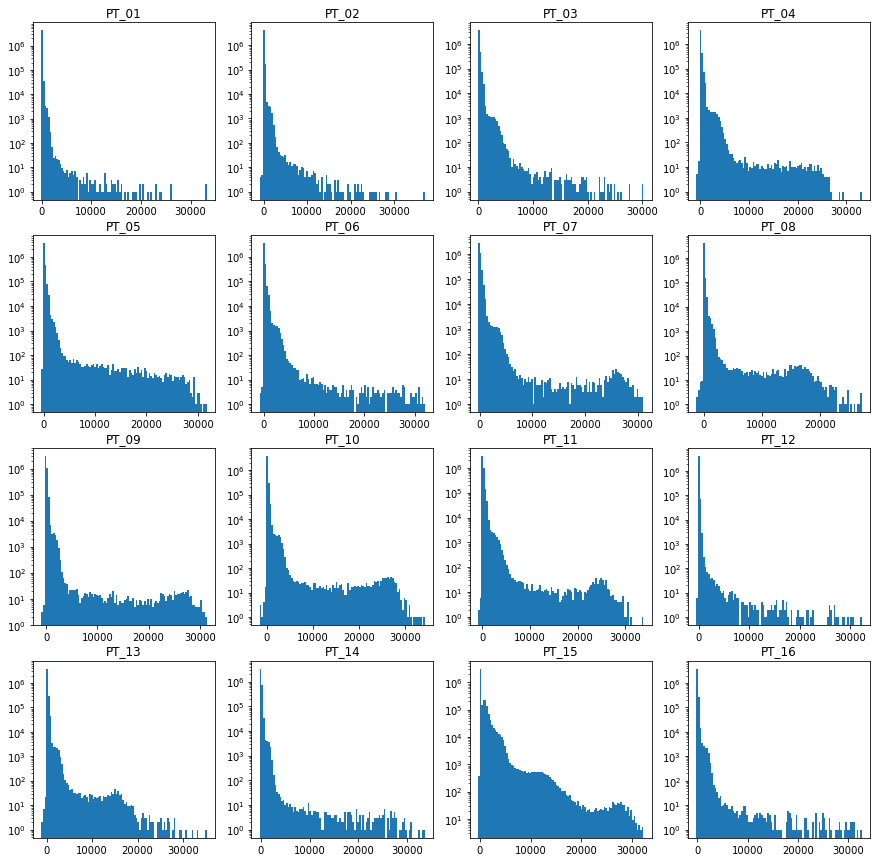

In [26]:
# PT Voxel Distribution

fig = plt.figure(figsize=(15,15))
axes = []

for i in range(16):
    axes.append(fig.add_subplot(4,4,i+1))
    axes[-1].set_title('PT_{:02d}'.format(i+1))
    axes[-1].hist((32767*PT_voxel[i]).reshape(-1), bins=100, log=True)

plt.show()

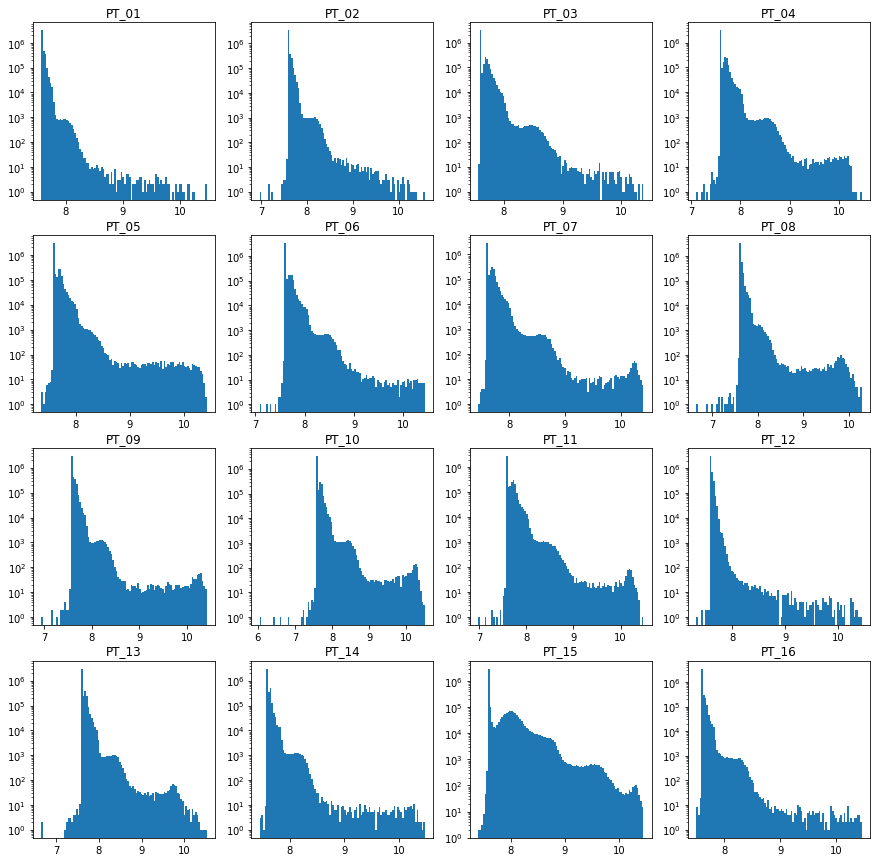

In [39]:
# PT Voxel Distribution with log scaling

fig = plt.figure(figsize=(15,15))
axes = []

for i in range(16):
    axes.append(fig.add_subplot(4,4,i+1))
    axes[-1].set_title('PT_{:02d}'.format(i+1))
    axes[-1].hist(np.log(32767*PT_voxel[i]+2e3).reshape(-1), bins=100, log=True)

plt.show()

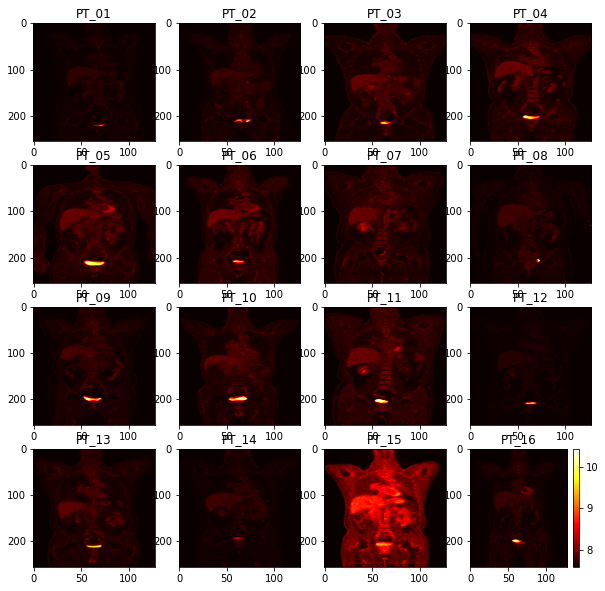

In [38]:
# PT Voxel Distribution

fig = plt.figure(figsize=(10,10))
axes = []

for i in range(16):
    axes.append(fig.add_subplot(4,4,i+1))
    axes[-1].set_title('PT_{:02d}'.format(i+1))
    clr = plt.imshow(np.log(32767*PT_voxel[i, 64].T + 2e3), cmap=plt.cm.hot, aspect='auto', vmax=np.log(3.4e4), vmin=np.log(2e3))

plt.colorbar(clr)
plt.show()

In [ ]:
6000, 22000